# Final Project

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [ ]:
# Transformations with Data Augmentation
train_transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),  # Convert to grayscale
    transforms.Resize((48, 48)),  # Resize to 48x48 - FER2013 standard
    transforms.RandomHorizontalFlip(),  # Randomly flip the image horizontally
    transforms.RandomRotation(10),  # Randomly rotate the image by up to 10 degrees
    transforms.ToTensor(),  # Convert to tensor
    transforms.Normalize((0.5,), (0.5,))  # Normalize images
])

In [3]:
test_transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),  # Convert to grayscale
    transforms.Resize((48, 48)),  # Resize to 48x48 (FER2013 standard)
    transforms.ToTensor(),  # Convert to tensor
    transforms.Normalize((0.5,), (0.5,))  # Normalize images
])

In [ ]:
# Setting up Data Paths
train_data = r"C:\CNN_Project\train"
test_data = r"C:\CNN_Project\test"

In [ ]:
train_dataset = datasets.ImageFolder(root=train_data, transform=train_transform)
test_dataset = datasets.ImageFolder(root=test_data, transform=test_transform)

In [9]:
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

In [ ]:
# CNN Model Architecture
class EmotionCNN(nn.Module):
    def __init__(self):
        super(EmotionCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)  # Additional layer
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(128 * 6 * 6, 256)  # Adjusted for the new input size
        self.fc2 = nn.Linear(256, len(train_dataset.classes))  # Number of classes in the dataset
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = self.pool(torch.relu(self.conv3(x)))  # Apply third convolution layer
        x = x.view(-1, 128 * 6 * 6)  # Flatten for the fully connected layer
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

In [ ]:
# Initialize Model, Loss Function, and Optimizer
model = EmotionCNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=0.0001)

In [ ]:
# Early Stopping Parameters
best_loss = float('inf')
patience = 5  # Number of epochs to wait before stopping
counter = 0

In [ ]:
# Training the Model with Tracking Loss and Accuracy
train_losses = []
train_accuracies = []

In [ ]:
epochs = 30  # Number of epochs
for epoch in range(epochs):
    model.train()  # Set the model to training mode
    running_loss = 0.0
    correct_preds = 0
    total_preds = 0
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
        # Calculate accuracy
        _, predicted = torch.max(outputs, 1)
        correct_preds += (predicted == labels).sum().item()
        total_preds += labels.size(0)
    
    avg_loss = running_loss / len(train_loader)
    accuracy = correct_preds / total_preds
    
    train_losses.append(avg_loss)
    train_accuracies.append(accuracy)
    
    print(f'Epoch [{epoch+1}/{epochs}], Loss: {avg_loss:.4f}, Accuracy: {accuracy:.4f}')

    # Early stopping logic
    if avg_loss < best_loss:
        best_loss = avg_loss
        counter = 0
    else:
        counter += 1
    if counter >= patience:
        print(f'Early stopping on epoch {epoch+1}')
        break

SyntaxError: invalid syntax (3393380797.py, line 14)

In [ ]:
# 
# Plot Training Loss and Accuracy
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

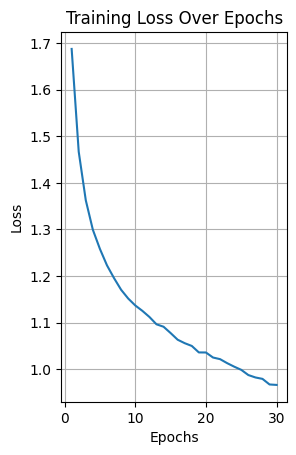

In [16]:
# Plot loss
plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_losses)+1), train_losses, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.grid(True)

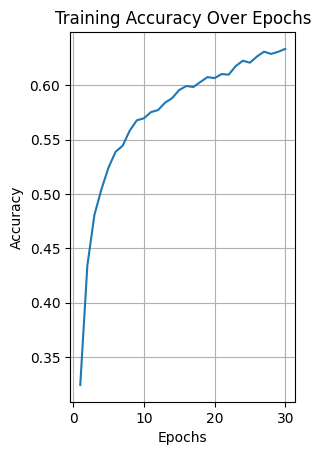

In [17]:
# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_accuracies)+1), train_accuracies, label='Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy Over Epochs')
plt.grid(True)

In [18]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

Accuracy: 0.6089
Precision: 0.6021
Recall: 0.6089
F1 Score: 0.6001


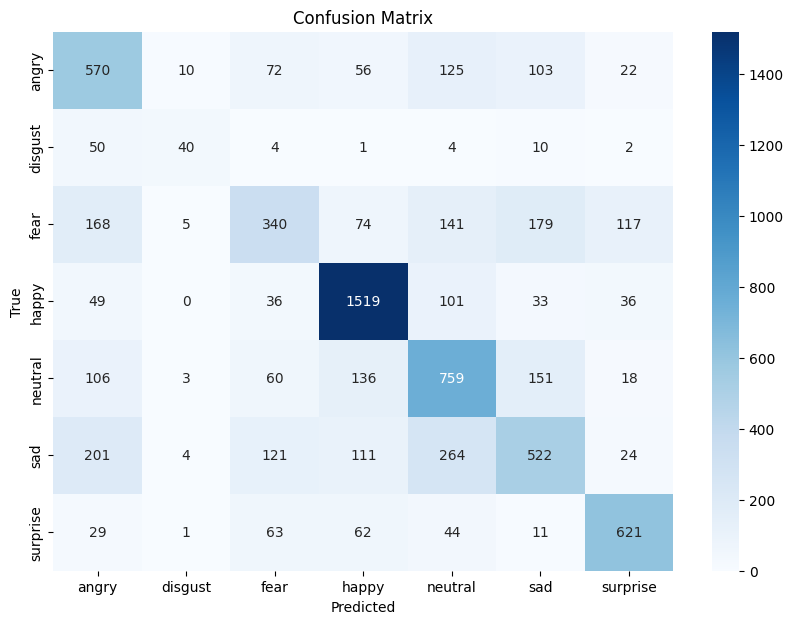

(0.6089439955419337,
 0.6021251181234527,
 0.6089439955419337,
 0.6001053031059153)

In [20]:
# Call the evaluation function after training
evaluate_model(model, test_loader)

In [ ]:
# Save the Trained Model
torch.save(model.state_dict(), 'emotion_cnn_model.pth')

In [ ]:
# Load the Model for Inference
model = EmotionCNN()
model.load_state_dict(torch.load('emotion_cnn_model.pth'))
model.eval()  # Set to evaluation mode

EmotionCNN(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=4608, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=7, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)

In [ ]:
import mediapipe as mp
print(mp)s
print(hasattr(mp, "solutions"))


<module 'mediapipe' from 'c:\\Guvi1\\env\\Lib\\site-packages\\mediapipe\\__init__.py'>
False
